Analysis of the MCMC optimization 

In [11]:
using DataFrames , CSV , Statistics
using PyPlot

## directory
rootdir = "/home/stephane/Science/GAIA"
wdir    = "$rootdir/products"
plotdir = "$rootdir/products/testfull2"

cd(wdir)

In [12]:
## Reading and joining the results from normal and full MCMC dbscan optimization.

mc     = CSV.read("votlist.mcmc.csv" , delim = ";")
mcfull = CSV.read("votlist.mcmc.full.csv", delim = ";")
mcj    = join(mc,mcfull, on = :votname, makeunique=true)

,votname,epsm,epsd,mneim,mneid,mclm,mcld,qcm,qcd,qnm,qnd,epsm_1,epsd_1,mneim_1,mneid_1,mclm_1,mcld_1,qcm_1,qcd_1,qnm_1,qnd_1,w3dm,w3dd,wvelm,wveld,whrdm,whrdd
,String⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,AH03 J0822-36.4-1.0deg.vot,4.14445,0.697091,7.87612,5.51462,15.6344,6.31867,1.75338,1.4814,845.665,1619.24,5.11061,0.991445,6.07892,4.06543,17.7306,6.1372,1.49253,0.0284506,13859.1,2885.55,5.39878,3.72498,3.55136,3.12078,2.26614,0.966988
2,Alessi 1-2.1deg.vot,2.5972,0.337568,7.98035,4.96053,16.4309,6.4616,1.93118,0.104514,160.895,47.0168,1.96993,0.511145,6.90043,4.17191,16.2051,6.02901,2.06855,0.0784554,185.084,48.178,3.41427,2.11167,7.99762,3.56632,2.0506,0.914408
3,Alessi 12-2.4deg.vot,2.36135,0.360011,8.50616,5.21141,16.3427,6.56897,2.30395,0.0855189,234.52,67.8692,2.02499,0.499447,7.44922,4.41792,17.6467,6.81384,2.31948,0.0977293,290.124,121.885,4.48411,2.03592,8.63144,2.54947,1.95928,0.835029
4,Alessi 13-15.9deg.vot,1.97031,0.440386,8.9657,5.45319,15.2647,6.4549,1.93446,0.0977608,54.4392,13.8243,1.97032,0.374212,7.98801,4.53389,17.9001,6.80905,2.04079,0.0579299,55.4172,11.4542,6.03637,2.31325,6.56022,2.63454,2.0204,0.958921
5,Alessi 19-2.4deg.vot,2.98782,1.11096,8.70097,7.52459,14.2797,5.65376,2.01927,1.26468,1555.44,4726.57,4.97887,1.02761,7.08125,4.59681,21.9058,5.68553,1.70428,0.0564405,45264.3,15946.9,5.49964,3.09258,1.68837,1.22537,2.48024,0.888036
6,Alessi 20-1.5deg.vot,2.06029,0.423221,9.05028,5.65059,16.9481,7.24447,2.57851,0.106681,228.567,72.2485,1.89006,0.438416,7.57542,4.60663,17.1788,6.73766,2.58471,0.108728,235.57,78.7792,5.03979,2.30864,6.37304,1.91068,2.05925,0.813244
7,Alessi 21-1.6deg.vot,2.69468,0.393744,7.2714,4.54395,15.9364,6.25632,2.11147,0.096966,177.788,55.0709,2.10974,0.486757,7.18482,4.23338,17.0073,6.27999,2.279,0.0735365,200.032,70.8877,3.52561,1.82618,8.50515,2.34117,2.04003,0.853029
8,Alessi 2-1.7deg.vot,2.83123,0.386362,8.1695,4.82943,17.1512,6.87771,2.08479,0.0836043,112.853,22.2714,2.25757,0.639092,7.8365,4.67522,17.8685,7.10634,2.12428,0.106081,142.25,39.5268,3.39288,1.91147,8.22364,3.19063,1.94329,0.883152
9,Alessi 3-2.2deg.vot,2.07674,0.362593,9.94539,6.08843,15.8864,6.5681,2.1158,0.0963156,133.664,37.375,1.70176,0.397934,7.92874,4.6728,17.7203,6.38789,2.27927,0.0751275,153.93,38.2787,4.09694,2.59092,9.47761,3.28613,2.0995,0.917955


In [13]:
sc     = CSV.read("votlist.SCproperties.csv",delim = ";")
scfull = CSV.read("votlist.SCproperties.full.csv",delim = ";")
scj    = join(sc,scfull, on = :votname, makeunique=true)

,votname,nstars,distance,l,b,vl,vb,vrad,xdisp,ydisp,zdisp,vldisp,vbdisp,vraddisp,nstars_1,distance_1,l_1,b_1,vl_1,vb_1,vrad_1,xdisp_1,ydisp_1,zdisp_1,vldisp_1,vbdisp_1,vraddisp_1
,String⍰,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,AH03 J0822-36.4-1.0deg.vot,274,482.796,254.872,0.393959,-21.9207,-4.95768,16.084,27.968,4.332,4.23978,5.95064,5.47353,20.4663,5165,757.457,254.976,0.302983,-27.206,-7.01768,26.9783,272.58,6.79531,6.94934,15.2532,9.35735,19.0951
2,Alessi 1-2.1deg.vot,166,465.324,122.822,-12.6407,16.3989,-6.96678,-5.92294,12.184,7.05744,4.06993,1.17804,1.07316,10.0507,178,465.488,122.809,-12.6715,16.3051,-6.92075,-5.93845,14.2506,7.3082,4.25791,1.00161,0.796881,9.60384
3,Alessi 12-2.4deg.vot,230,544.088,67.4508,-11.4344,-2.85726,-16.2187,3.18242,15.2794,4.87104,3.76035,1.07742,1.0589,14.8162,236,544.102,67.4639,-11.426,-2.89079,-16.2264,5.2948,15.5637,5.32524,3.97477,0.859671,0.919034,10.8815
4,Alessi 13-15.9deg.vot,55,104.597,237.677,-55.9278,1.10859,18.1381,18.935,3.78544,3.75736,2.0869,0.79029,0.577233,2.57862,53,104.369,237.836,-55.9756,1.06618,18.1623,16.8763,3.61082,3.45935,2.07472,0.759445,0.574098,1.01029
5,Alessi 19-2.4deg.vot,54,593.195,40.3436,12.6377,-19.4171,-5.72308,-13.5933,10.5855,5.52268,3.27965,1.30206,1.04895,6.76326,26288,636.509,40.35,12.5454,-16.6826,-4.16167,-13.638,241.73,14.2987,13.7161,25.3235,17.5234,30.2461
6,Alessi 20-1.5deg.vot,228,433.526,117.462,-3.76955,15.6124,-7.78073,-6.22729,12.3735,3.36106,3.16083,0.948935,0.975608,9.58831,211,433.735,117.485,-3.78227,15.6544,-7.72939,-5.10956,12.0481,3.12092,2.75358,0.905614,0.950342,9.62263
7,Alessi 21-1.6deg.vot,195,571.152,223.489,-0.092201,-13.0734,-9.78318,41.1322,17.7112,4.89533,4.19312,1.19632,1.34206,6.47805,198,571.44,223.484,-0.0860801,-13.1662,-9.98761,41.8898,19.2161,5.37006,4.15492,0.926319,0.991055,7.00709
8,Alessi 2-1.7deg.vot,106,628.646,152.297,6.34721,0.766818,-4.33118,-8.43253,14.6196,4.21263,2.92524,0.836697,0.903586,9.46703,130,628.941,152.39,6.33003,0.694843,-4.25317,-10.6923,17.3391,5.72313,3.38924,0.641653,0.779721,10.4937
9,Alessi 3-2.2deg.vot,122,280.213,257.553,-15.2584,-19.8081,-5.75232,2.08823,5.43361,3.59105,2.80544,1.0057,1.07721,4.67284,151,281.987,257.588,-15.2035,-19.8656,-5.76365,2.14782,8.60764,4.00565,3.24581,0.849926,0.949275,4.54651


In [14]:
println("## Summary :")
println("##")
println("## votable with dbscan-only :",size(sc))
println("## votable with dbscan-weighting :",size(scfull))
println("## Join votable :",size(scj))

## Summary :
##
## votable with dbscan-only :(308, 14)
## votable with dbscan-weighting :(142, 14)
## Join votable :(120, 27)


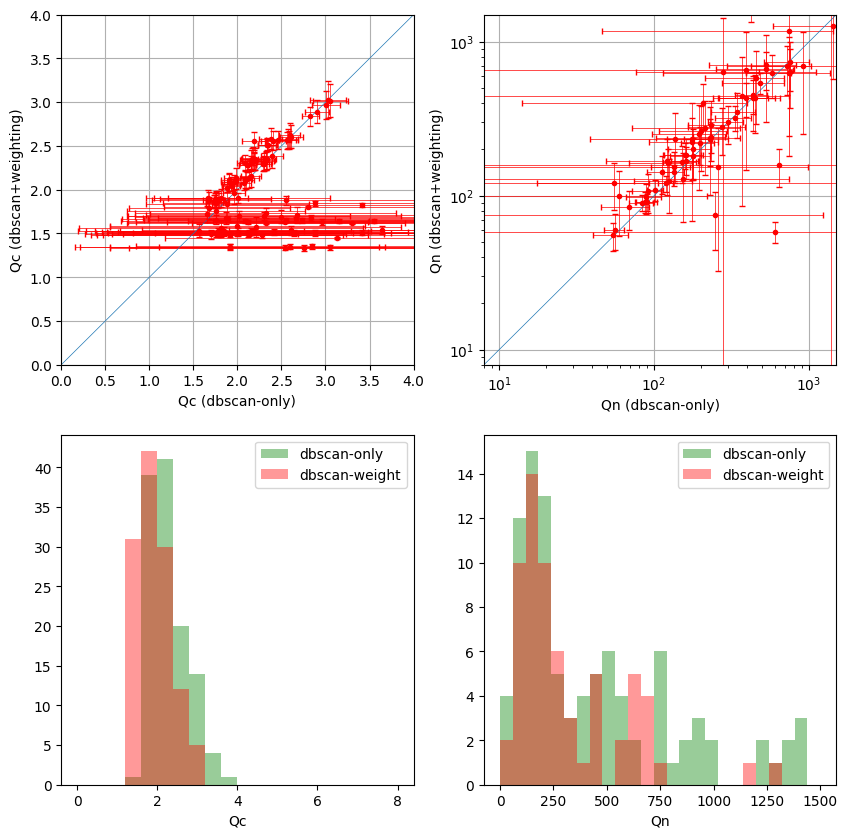

In [15]:
## Q comparisons

fig = figure(figsize=(10,10))

ax = subplot(221)
grid("on") 
plot([0.,10.],[0.,10] ,linewidth = 0.5)
errorbar(mcj[:qcm],mcj[:qcm_1] , xerr=mcj[:qcd],yerr= mcj[:qcd_1] , fmt = ".r" , capsize = 2 ,elinewidth=0.5)
ax[:set_xlim]([0.,4.])
ax[:set_ylim]([0.,4.])
xlabel("Qc (dbscan-only)")
ylabel("Qc (dbscan+weighting)")

ax = subplot(222)
grid("on") 
plot([1.,10000.],[1.,10000], linewidth = 0.5)
xscale("log")
yscale("log")
errorbar(mcj[:qnm],mcj[:qnm_1] , xerr=mcj[:qnd],yerr= mcj[:qnd_1] , fmt = ".r" , capsize = 2 ,elinewidth=0.5)
ax[:set_xlim]([8.,1500.])
ax[:set_ylim]([8.,1500.])
xscale("log")
yscale("log")
xlabel("Qn (dbscan-only)")
ylabel("Qn (dbscan+weighting)")

ax = subplot(223)
nbins = 20
h = plt[:hist](mcj[:qcm],nbins,range = [0,8], color = "g", alpha=0.4 , label = "dbscan-only")
h = plt[:hist](mcj[:qcm_1],nbins,range = [0,8], color = "r", alpha=0.4 , label = "dbscan-weight")
legend()
xlabel("Qc")

ax = subplot(224)
nbins = 25
h = plt[:hist](mcj[:qnm],nbins,range = [0,1500], color = "g", alpha=0.4 , label = "dbscan-only")
h = plt[:hist](mcj[:qnm_1],nbins,range = [0,1500], color = "r", alpha=0.4 , label = "dbscan-weight")
legend()
xlabel("Qn")

show()

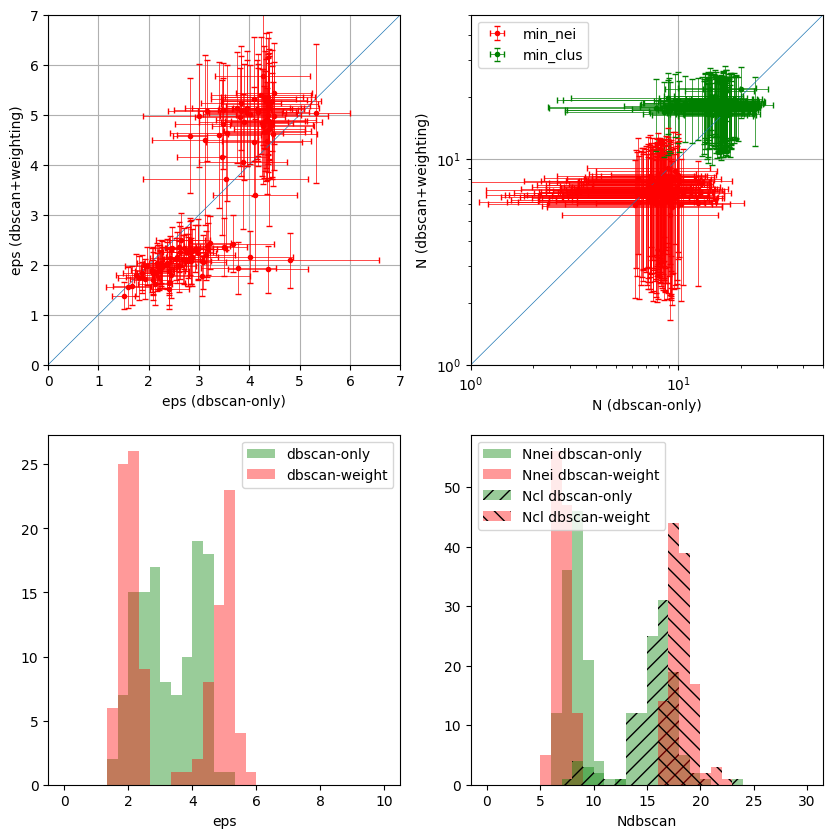

In [16]:
## comparison DBSCAN parameters

fig = figure(figsize=(10,10))

ax = subplot(221)
grid("on") 
plot([0.,10.],[0.,10], linewidth = 0.5)
errorbar(mcj[:epsm],mcj[:epsm_1] , xerr=mcj[:epsd],yerr= mcj[:epsd_1] , fmt = ".r" , capsize = 2 ,elinewidth=0.5)
ax[:set_xlim]([0.,7])
ax[:set_ylim]([0.,7])
xlabel("eps (dbscan-only)")
ylabel("eps (dbscan+weighting)")

ax = subplot(222)
grid("on") 
plot([0.,10000.],[0.,10000], linewidth = 0.5)
errorbar(mcj[:mneim],mcj[:mneim_1] , xerr=mcj[:mneid],yerr= mcj[:mneid_1] , fmt = ".r" , 
    capsize = 2 ,elinewidth=0.5, label="min_nei")
errorbar(mcj[:mclm],mcj[:mclm_1] , xerr=mcj[:mcld],yerr= mcj[:mcld_1] , fmt = ".g" , 
    capsize = 2 ,elinewidth=0.5, label="min_clus")
ax[:set_xlim]([1.,50])
ax[:set_ylim]([1.,50])
legend(loc="upper left")
xscale("log")
yscale("log")
xlabel("N (dbscan-only)")
ylabel("N (dbscan+weighting)")

ax = subplot(223)
nbins = 30
h = plt[:hist](mcj[:epsm],nbins,range = [0.,10.], color = "g", alpha=0.4 , label = "dbscan-only")
h = plt[:hist](mcj[:epsm_1],nbins,range = [0., 10.] , color = "r", alpha=0.4 , label = "dbscan-weight")
legend()
xlabel("eps")

ax = subplot(224)
nbins = 30
h = plt[:hist](mcj[:mneim],nbins, range = [0,30],  color = "g", alpha=0.4 , label = "Nnei dbscan-only")
h = plt[:hist](mcj[:mneim_1],nbins, range = [0,30], color = "r", alpha=0.4 , label = "Nnei dbscan-weight")
h = plt[:hist](mcj[:mclm],nbins, range = [0,30], color = "g", hatch="//", alpha=0.4 , label = "Ncl dbscan-only")
h = plt[:hist](mcj[:mclm_1],nbins, range = [0,30], color = "r", hatch="\\\\", alpha=0.4 , label = "Ncl dbscan-weight")
legend(loc="upper left")
xlabel("Ndbscan")
show()

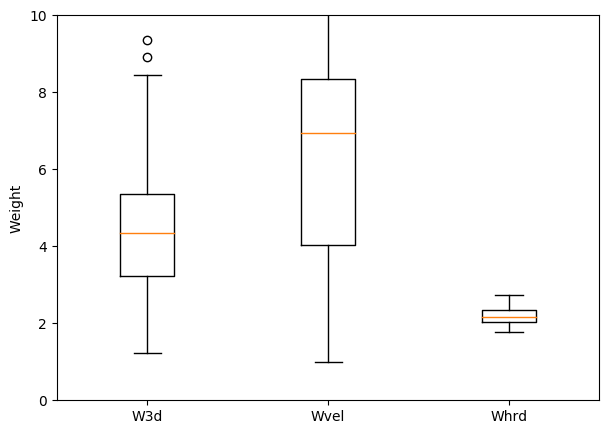

Weights: median
W3d : 4.334892440848047
Wvel : 6.949159341509985
Whrd : 2.1551752808564486


In [17]:
### Weighting stats ..
fig = figure(figsize=(7,5))

ax = subplot(111)
ax[:set_ylim]([0.,10.])
data = [mcfull[:w3dm] ,mcfull[:wvelm] , mcfull[:whrdm]]
boxplot(data)
ax[:set_xticklabels](["W3d","Wvel","Whrd"])
ylabel("Weight")

show()
println("Weights: median")
println("W3d : ",median(mcfull[:w3dm]))
println("Wvel : ",median(mcfull[:wvelm]))
println("Whrd : ",median(mcfull[:whrdm]))

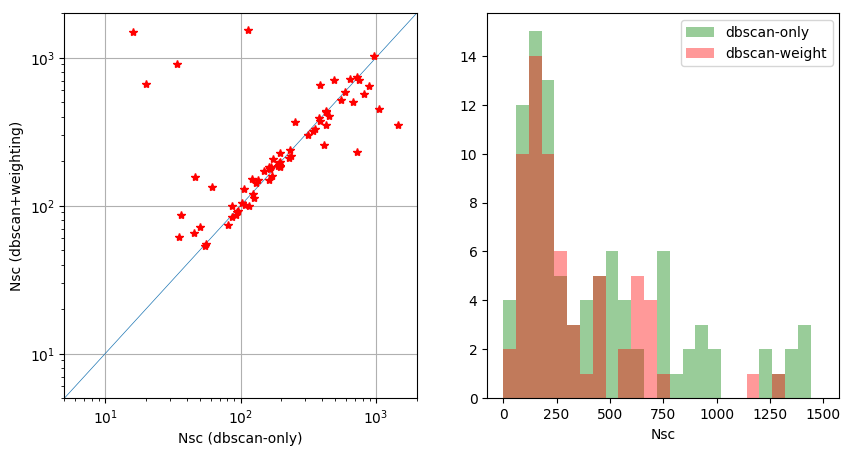

In [18]:
## Number of stars in the final SC

fig = figure(figsize=(10,5))

ax = subplot(121)
grid("on") 
plot([0.,10000.],[0.,10000] ,linewidth = 0.5)
plot(scj[:nstars], scj[:nstars_1], "*r")
ax[:set_xlim]([5.,2000.])
ax[:set_ylim]([5.,2000.])
xlabel("Nsc (dbscan-only)")
ylabel("Nsc (dbscan+weighting)")
xscale("log")
yscale("log")

ax = subplot(122)
nbins = 25
h = plt[:hist](mcj[:qnm],nbins,range = [0,1500], color = "g", alpha=0.4 , label = "dbscan-only")
h = plt[:hist](mcj[:qnm_1],nbins,range = [0,1500], color = "r", alpha=0.4 , label = "dbscan-weight")
legend()
xlabel("Nsc")

show()

###  Comparison of the SC properties for the optimization with DBSCAN only and DBSCAN+weighting 

<br>
<br>

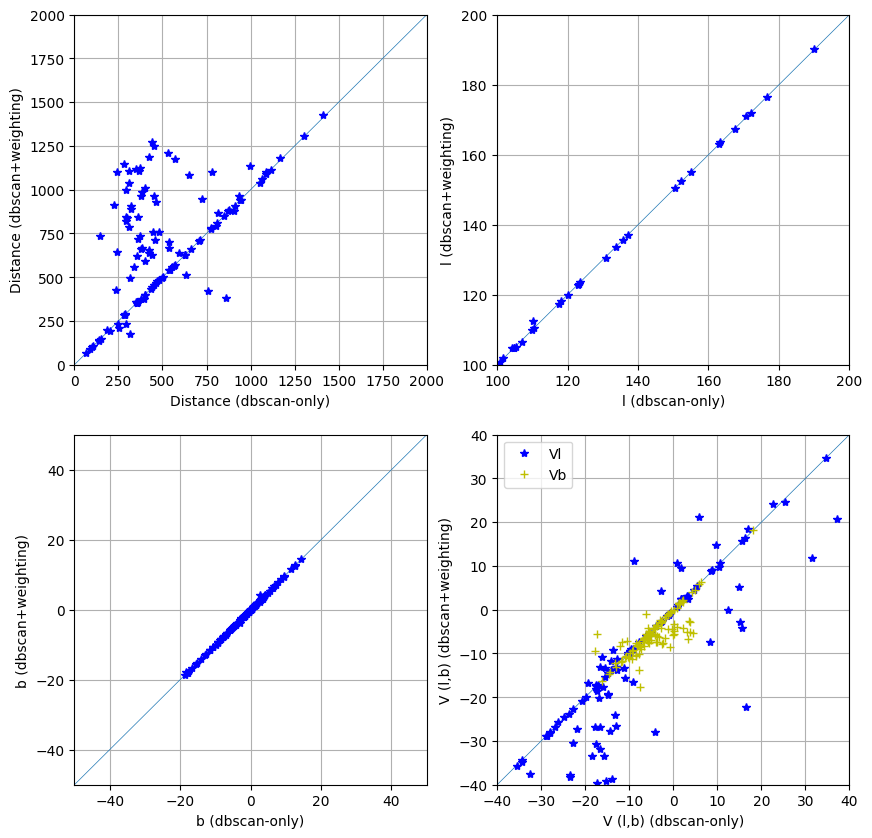

In [19]:
## Distance , position, velocity

fig = figure(figsize=(10,10))

ax = subplot(221)
grid("on") 
plot([0.,10000.],[0.,10000] ,linewidth = 0.5)
plot(scj[:distance], scj[:distance_1], "*b")
ax[:set_xlim]([0.,2000.])
ax[:set_ylim]([0.,2000.])
xlabel("Distance (dbscan-only)")
ylabel("Distance (dbscan+weighting)")

ax = subplot(222)
grid("on") 
plot([0.,10000.],[0.,10000] ,linewidth = 0.5)
plot(scj[:l], scj[:l_1], "*b")
ax[:set_xlim]([100.,200.])
ax[:set_ylim]([100.,200.])
xlabel("l (dbscan-only)")
ylabel("l (dbscan+weighting)")

ax = subplot(223)
grid("on") 
plot([-10000.,10000.],[-10000.,10000] ,linewidth = 0.5)
plot(scj[:b], scj[:b_1], "*b")
ax[:set_xlim]([-50.,50.])
ax[:set_ylim]([-50.,50.])
xlabel("b (dbscan-only)")
ylabel("b (dbscan+weighting)")

ax = subplot(224)
grid("on") 
plot([-10000.,10000.],[-10000.,10000] ,linewidth = 0.5)
plot(scj[:vl], scj[:vl_1], "*b", label = "Vl")
plot(scj[:vb], scj[:vb_1], "+y", label = "Vb")
legend()
ax[:set_xlim]([-40.,40.])
ax[:set_ylim]([-40.,40.])
xlabel("V (l,b) (dbscan-only)")
ylabel("V (l,b) (dbscan+weighting)")

show()

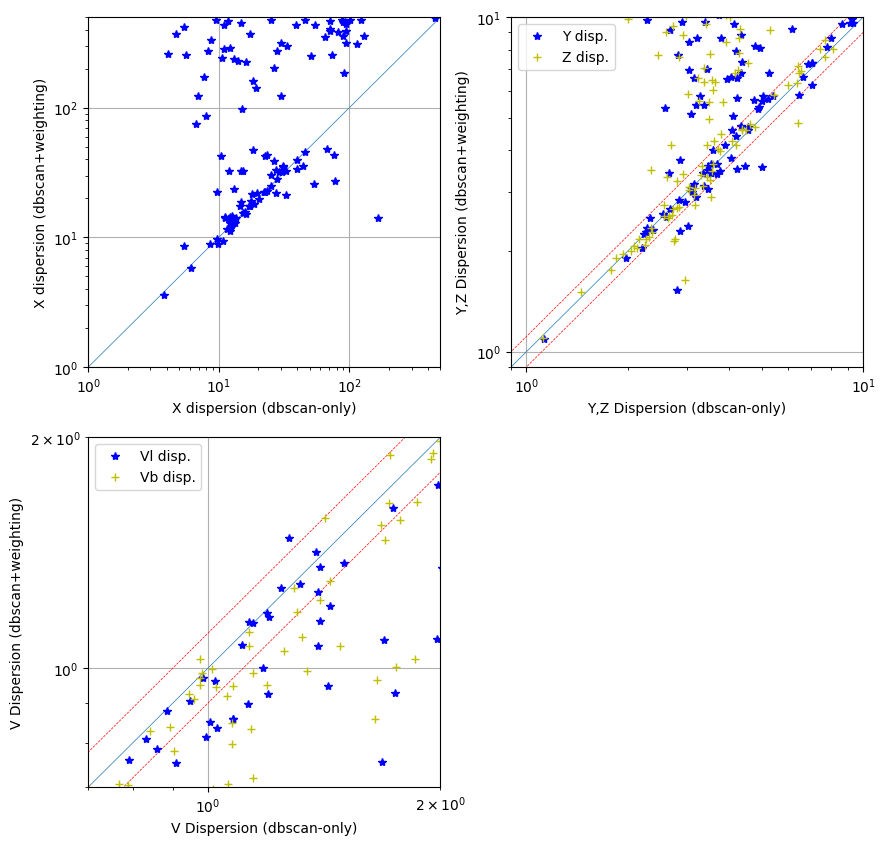

In [20]:
## Dispersions ...
fig = figure(figsize=(10,10))

ax = subplot(221)
grid("on") 
plot([0.,10000.],[0.,10000] ,linewidth = 0.5)
plot(scj[:xdisp], scj[:xdisp_1], "*b")
ax[:set_xlim]([1,500.])
ax[:set_ylim]([1,500.])
xlabel("X dispersion (dbscan-only)")
ylabel("X dispersion (dbscan+weighting)")
xscale("log")
yscale("log")

ax = subplot(222)
grid("on") 
plot([-10000.,10000.],[-10000.,10000] ,linewidth = 0.5)
plot([-10000.,10000.],[-9000.,9000] ,"r--" ,linewidth = 0.5)
plot([-9000.,9000],[-10000.,10000.] ,"r--" ,linewidth = 0.5)
plot(scj[:ydisp], scj[:ydisp_1], "*b", label = "Y disp.")
plot(scj[:zdisp], scj[:zdisp_1], "+y", label = "Z disp.")
legend()
ax[:set_xlim]([0.9,10.])
ax[:set_ylim]([0.9,10.])
xlabel("Y,Z Dispersion (dbscan-only)")
ylabel("Y,Z Dispersion (dbscan+weighting)")

xscale("log")
yscale("log")


ax = subplot(223)
grid("on") 
plot([-10000.,10000.],[-10000.,10000] ,linewidth = 0.5)
plot([-10000.,10000.],[-9000.,9000] ,"r--" ,linewidth = 0.5)
plot([-9000.,9000],[-10000.,10000.] ,"r--" ,linewidth = 0.5)
plot(scj[:vldisp], scj[:vldisp_1], "*b", label = "Vl disp.")
plot(scj[:vbdisp], scj[:vbdisp_1], "+y", label = "Vb disp.")
legend(loc="upper left")
ax[:set_xlim]([0.7, 2.])
ax[:set_ylim]([0.7, 2.])
xlabel("V Dispersion (dbscan-only)")
ylabel("V Dispersion (dbscan+weighting)")

xscale("log")
yscale("log")
show()